# Programmazione Genetica


In questo esempio utilizzeremo [GPLearn](https://github.com/trevorstephens/gplearn), una libreria Python per la programmazione genetica. In questo esempio vedremo un problema di regressione simbolica in due dimensioni (i.e., con due variabili di input).



Prima di tutto importiamo tutte le librerie necessarie.

In [16]:
%matplotlib inline
import gplearn.genetic as gp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import sklearn.utils as skutil

Definiamo come funzione target $f(x,y) = \sin(3x) + \sin(3y)$. Possiamo cambiarla con qualsiasi altra funzione. Notate che questa *non* è la funzione di fitness, ma la funzione che vogliamo trovare: il nostro ottimo globale. La fitness sarà una misura della distanza da questa funzione.

In [17]:
def target(x, y):
    return np.sin(3*x) + np.sin(3*y)

La funzione obiettivo $f$ è valutata su $10^5$ punti in $[-1,1] \times [-1,1]$, un quadrato di lato $2$ centrato in $(0,0)$.

In [18]:
x_coords = np.linspace(-1, 1, 100)
y_coords = np.linspace(-1, 1, 100)
x_coords, y_coords = np.meshgrid(x_coords,y_coords)
target_points = target(x_coords,y_coords)

Possiamo ora visualizzare la forma della funzione che vogliamo apprendere.

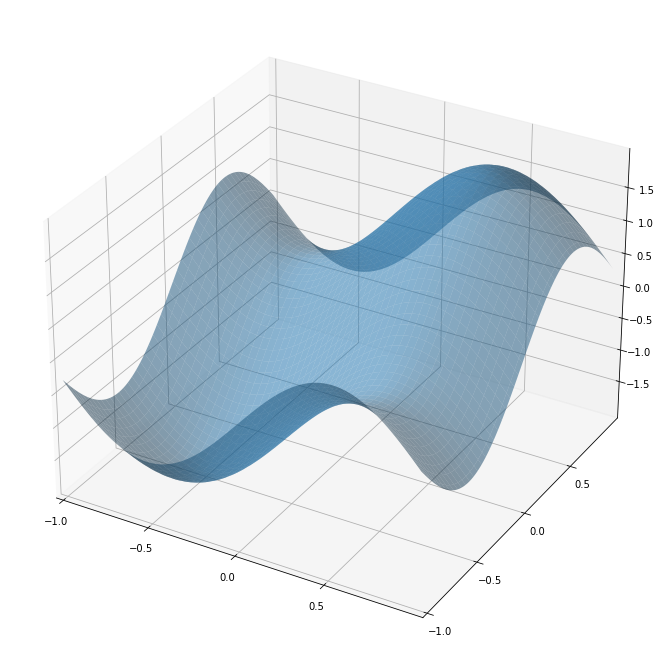

In [19]:
figure = plt.figure(figsize=(16, 12))
ax = figure.add_subplot(projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xticks(np.arange(-1,1,.5))
ax.set_yticks(np.arange(-1,1,.5))
ax.plot_surface(x_coords, y_coords, target_points, alpha=0.5)
plt.show()

Per il processo di apprendimento, valuteremo quanto la funzione scelta approssima $100$ punti selezionati casualmente in $[-1,1]\times[-1,1]$. Questo significa che GP non conosce la funzione, ma solo un sottoinsieme di punti su cui essa viene valutata.

In [20]:
rng = skutil.check_random_state(0)

x_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = target(x_train[:, 0], x_train[:, 1])

Effettuiamo un run di GP. Il set di simboli funzionali contiene $+$, $\times$, $-$ e $\div$, e anche le funzioni $\sin$, $\cos$, $\sqrt{\cdot}$. Provate a cambiare per vedere come cambia il processo di evoluzione.

In [23]:
fset=('add', 'sub', 'mul', 'div', 'sqrt')
predicted_data = []
max_gen = 31
sr = gp.SymbolicRegressor(population_size=500,
                          generations=1,
                          function_set=fset,
                          stopping_criteria=0.01,
                          p_crossover=0.8, # Probabilità di crossover
                          p_subtree_mutation=0.1, # Probabilità di mutazione
                          p_hoist_mutation=0.05, # Differente tipologia di mutazione
                          p_point_mutation=0.05, # Altra tipologia di mutazione
                          parsimony_coefficient=0.01, # Fattore di penalizzazione per alberi grandi
                          verbose=0,
                          random_state=0,
                          warm_start=True)
for i in range(0, max_gen):
    sr.set_params(generations=i+1)
    sr.fit(x_train, y_train)
    predicted_data.append(sr.predict(np.c_[x_coords.ravel(),y_coords.ravel()]).reshape(x_coords.shape))

Visualizziamo ora come cambia la funzione trovata da GP al passare delle generazioni.

Generazione 0


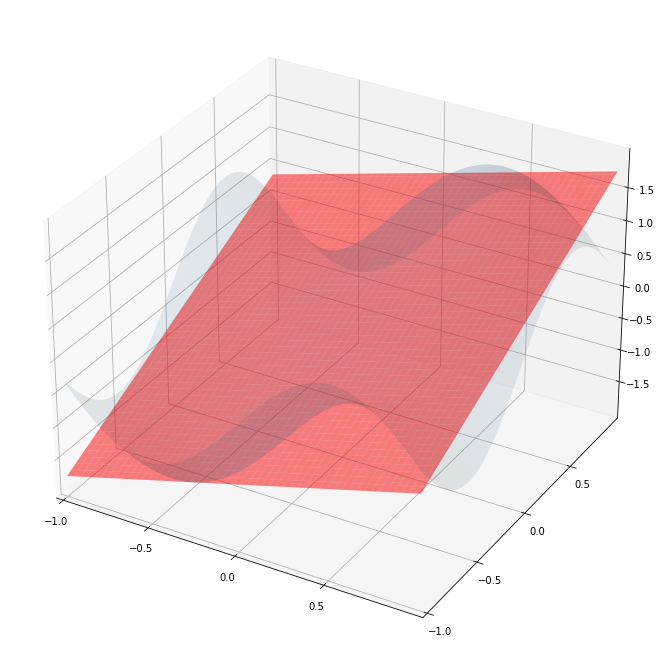

Generazione 5


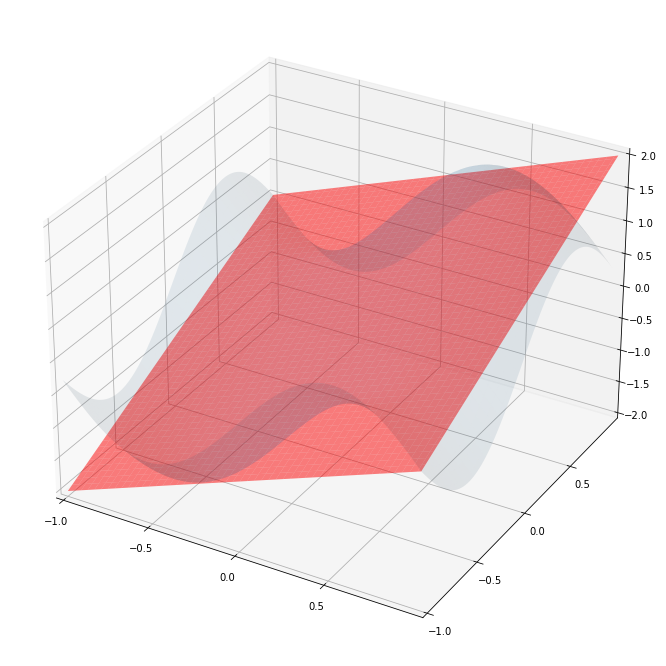

Generazione 10


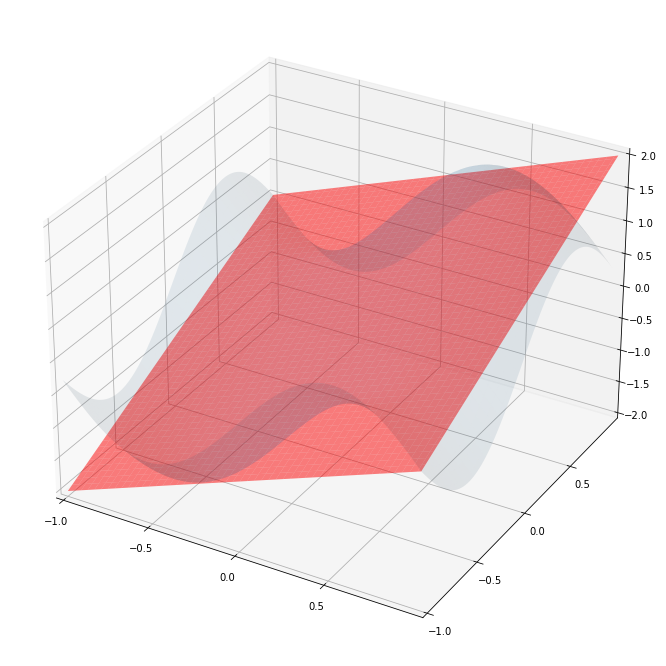

Generazione 15


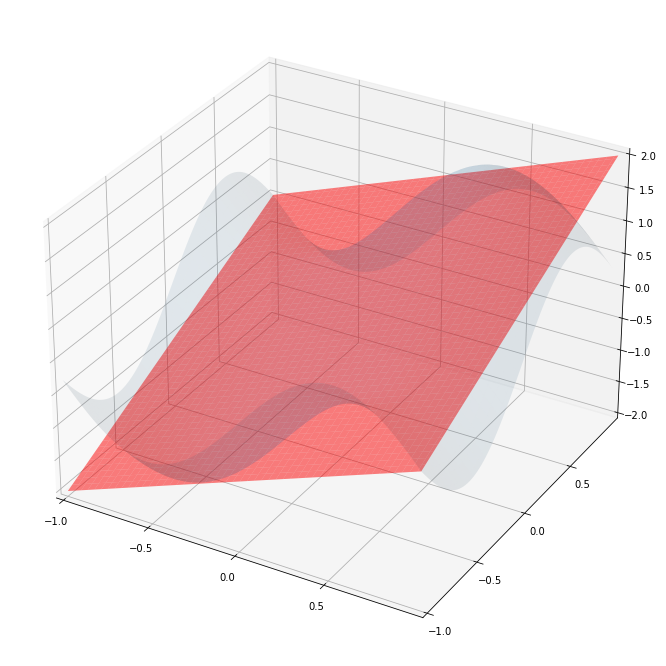

Generazione 20


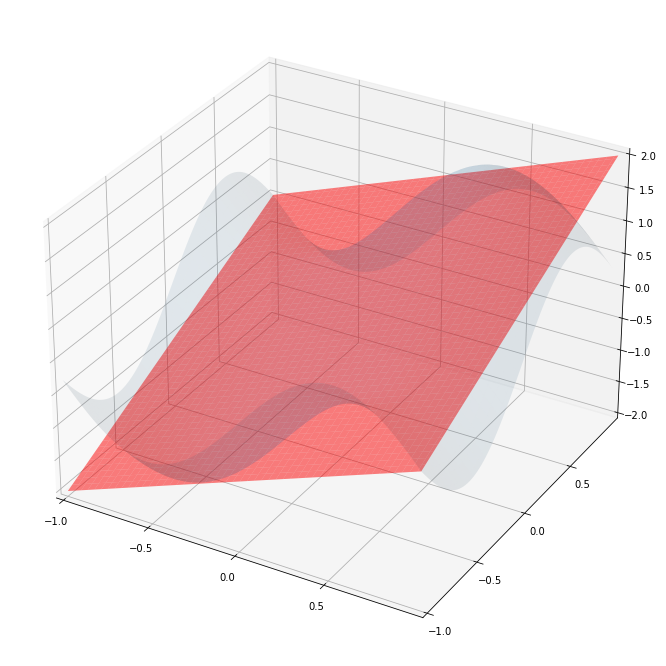

Generazione 25


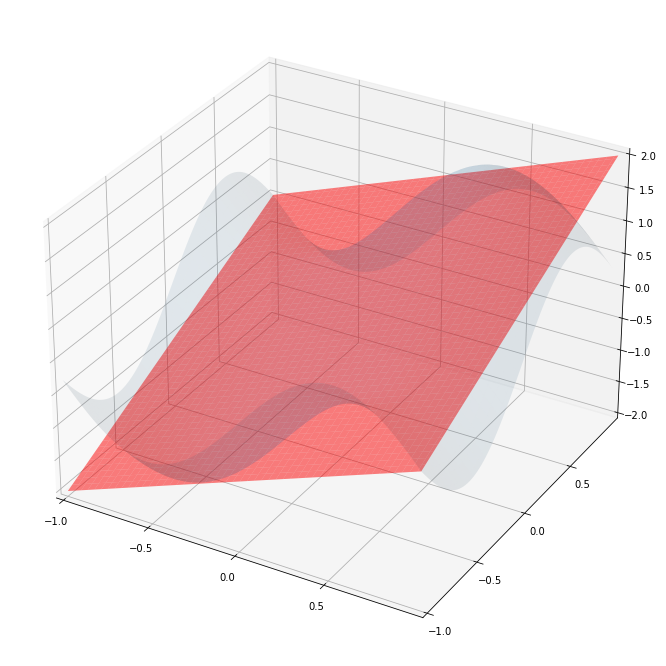

Generazione 30


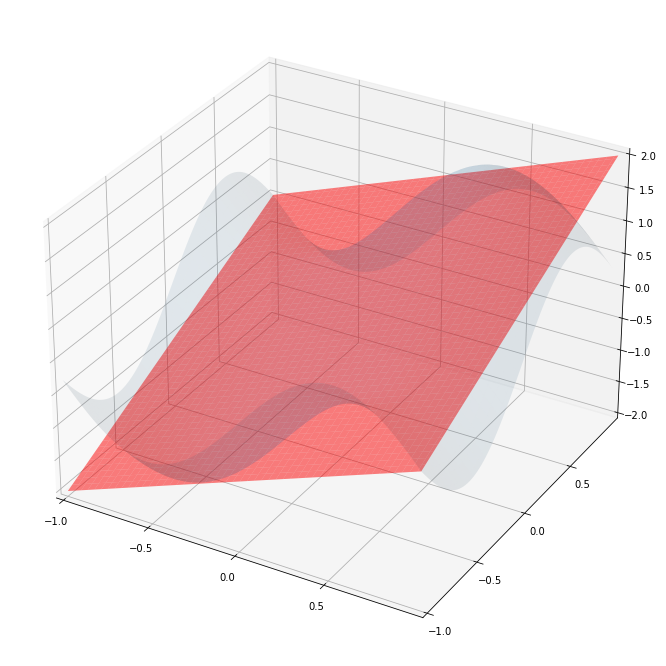

In [24]:
def print_results(i):
    figure = plt.figure(figsize=(16, 12))
    ax = figure.add_subplot(projection='3d')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xticks(np.arange(-1,1,.5))
    ax.set_yticks(np.arange(-1,1,.5))
    ax.plot_surface(x_coords, y_coords, predicted_data[i], alpha=0.5, color='red')
    ax.plot_surface(x_coords, y_coords, target_points, alpha=0.1)

for i in range(0,31,5):
    print(f"Generazione {i}")
    print_results(i)
    plt.show()

Come è possibile osservare, attorno alla generazione $30$ il processo di GP trova l'ottimo.